- Smoothing: to remove fine-grained variation between time steps
- to remove noise and better expose the signal of underlying causal process
- Moving averages -> common type of smoothing
- calculating moving averages -> creating new series where values are comprised of average of raw observations in the original time series


- 2 main types of moving average:
    - Centered moving average
        - before and after time t
        - window 3 -> mean(t-1, t, t+1)
        - used to remove trend and seasonal components
    - Trailing moving average
        - before time t
        - window 3 -> mean(t-2, t-1, t)
        - used in forecasting
- Data should be stationary (make stationary by either differencing or model the behaviour and explicitly subtract it from the series)
- rolling() in pandas -= by default - trailing window

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


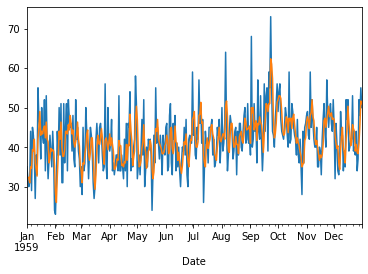

In [2]:
rolling_mean = df.rolling(window=3).mean()
print(rolling_mean.head(10))
df.plot()
rolling_mean.plot()
plt.show()

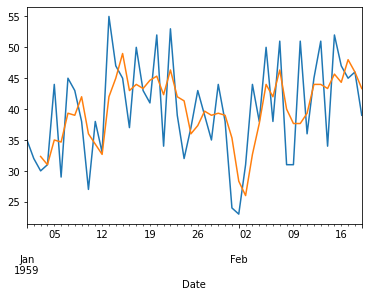

In [3]:
df[:50].plot()
rolling_mean[:50].plot()
plt.show()

#### Moving Average as Feature engineering

In [4]:
dataframe = pd.DataFrame(df.values)
width = 3
lag1 = dataframe.shift(1)
lag3 = dataframe.shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()
data = pd.concat([means, lag1, dataframe], axis=1)
data.columns = ['mean', 't', 't+1']
data.head(10)

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


#### Moving Average as Prediction

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


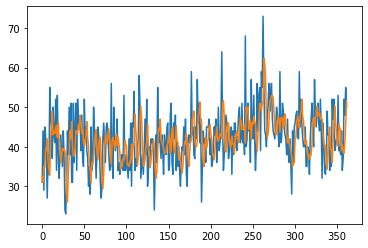

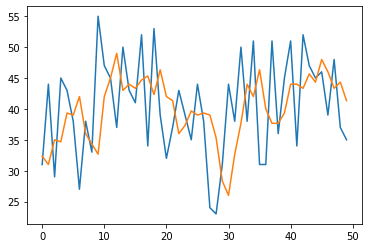

In [5]:
from sklearn.metrics import mean_squared_error
import math
X = df.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = math.sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f'%rmse)

plt.plot(test)
plt.plot(predictions)
plt.show()

plt.plot(test[:50])
plt.plot(predictions[:50])
plt.show()